# TP3 - Pregunta 3: Generalización del Algoritmo

## Objetivo
Generalizar el algoritmo de detección múltiple del ítem 2 para **todas las imágenes** del directorio, visualizando los resultados con bounding boxes y niveles de confianza.

## Metodología
- Aplicar el algoritmo de detección múltiple a todo el conjunto de imágenes
- Configuración balanceada que funcione para diferentes tipos de imágenes
- Análisis comparativo de resultados entre imágenes
- Visualización completa con métricas de rendimiento

## 1. Importación de librerías y configuración

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob

# Importar módulos locales
from template_matching_lib.config import crear_config_dict
from template_matching_lib.preprocessing import cargar_template
from template_matching_lib.utils import obtener_imagenes, procesar_imagen_multi, crear_directorio_resultados

print("Librerías importadas correctamente")
print(f"OpenCV version: {cv2.__version__}")

Librerías importadas correctamente
OpenCV version: 4.12.0


## 2. Configuración del experimento generalizado

In [2]:
# Crear configuración para detección general (todas las imágenes)
config = crear_config_dict('general')

print("Configuración para detección generalizada:")
print(f"- Directorio de imágenes: {config['PATH_IMAGENES']}")
print(f"- Directorio de template: {config['PATH_TEMPLATE']}")
print(f"- Rango de escalas: {config['ESCALA_MIN']} a {config['ESCALA_MAX']}")
print(f"- Paso de escala: {config['PASO_ESCALA']}")
print(f"- Umbral de detección: {config['UMBRAL_DETECCION']}")
print(f"- Umbral IOU para NMS: {config['UMBRAL_IOU_NMS']}")
print(f"- Límite de detecciones finales: {config['LIMITE_FINAL']}")
print(f"- EPS para clustering: {config['CLUSTERING_EPS']}")
print(f"- Early stopping escalas: {config['EARLY_STOPPING_ESCALAS']}")
print(f"- Directorio de resultados: {config['CARPETA_RESULTADOS']}")

# Crear directorio de resultados
crear_directorio_resultados(config)

Configuración para detección generalizada:
- Directorio de imágenes: TP3/images/
- Directorio de template: TP3/template/
- Rango de escalas: 0.25 a 2.8
- Paso de escala: 0.01
- Umbral de detección: 0.03
- Umbral IOU para NMS: 0.08
- Límite de detecciones finales: 10
- EPS para clustering: 20
- Early stopping escalas: 20
- Directorio de resultados: resultados_test_general


## 3. Carga del template

Cargando template desde: TP3/template/pattern.png
Template cargado exitosamente
Dimensiones del template original: (175, 400, 3)
Dimensiones del template con Canny: (175, 400)


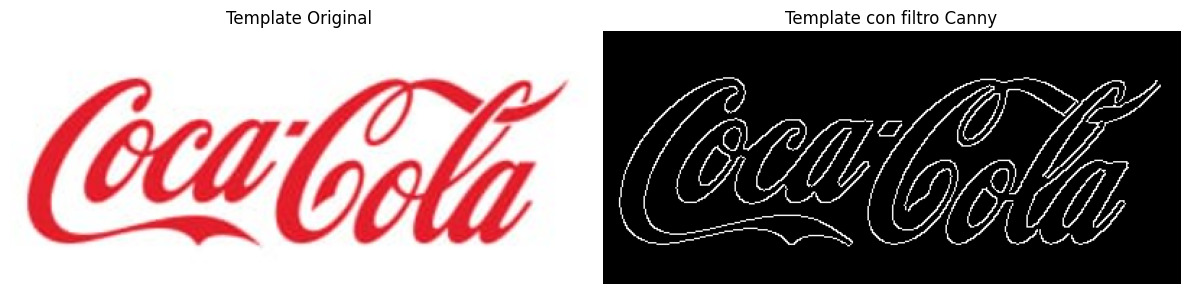

In [3]:
# Cargar el template
template_path = f"{config['PATH_TEMPLATE']}pattern.png"
print(f"Cargando template desde: {template_path}")

# Cargar template original
template_original = cv2.imread(template_path)
if template_original is None:
    raise ValueError(f"No se pudo cargar el template desde {template_path}")

# Cargar template procesado
template_canny = cargar_template(template_path, config)

print(f"Template cargado exitosamente")
print(f"Dimensiones del template original: {template_original.shape}")
print(f"Dimensiones del template con Canny: {template_canny.shape}")

# Visualizar el template
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(cv2.cvtColor(template_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Template Original')
axes[0].axis('off')

axes[1].imshow(template_canny, cmap='gray')
axes[1].set_title('Template con filtro Canny')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Crear diccionario para compatibilidad con el resto del código
template_data = {
    'template': template_original,
    'template_canny': template_canny
}

## 4. Obtener todas las imágenes (excluyendo coca_multi)

In [4]:
# Obtener todas las imágenes excepto coca_multi.png
imagenes = obtener_imagenes(config=config, excluir_multi=True)

print(f"Se encontraron {len(imagenes)} imágenes para procesar:")
print("(Excluyendo coca_multi.png que ya fue procesada en la pregunta 2)\n")

for i, img in enumerate(imagenes, 1):
    nombre = os.path.basename(img)
    # Obtener tamaño de la imagen
    try:
        temp_img = cv2.imread(img)
        altura, ancho = temp_img.shape[:2]
        print(f"{i:2d}. {nombre:<25} ({ancho}x{altura})")
    except:
        print(f"{i:2d}. {nombre:<25} (Error leyendo)")

if not imagenes:
    print("ERROR: No se encontraron imágenes para procesar.")
    print(f"Verificar que exista el directorio: {config['PATH_IMAGENES']}")

Se encontraron 6 imágenes para procesar:
(Excluyendo coca_multi.png que ya fue procesada en la pregunta 2)

 1. coca_logo_1.png           (207x500)
 2. coca_logo_2.png           (233x363)
 3. logo_1.png                (687x450)
 4. coca_retro_1.png          (715x493)
 5. coca_retro_2.png          (715x429)
 6. COCA-COLA-LOGO.jpg        (1389x1389)


## 5. Procesamiento de todas las imágenes

In [5]:
# Procesar todas las imágenes
resultados = {}

if imagenes:
    
    for i, ruta_imagen in enumerate(tqdm(imagenes, desc="Procesando imágenes"), 1):
        nombre = os.path.basename(ruta_imagen)        
        
        
        # Procesar imagen con algoritmo de detección múltiple
        detecciones = procesar_imagen_multi(ruta_imagen, template_canny, config)
        resultados[nombre] = detecciones

    
else:
    print("No hay imágenes para procesar.")

Procesando imágenes: 100%|██████████| 6/6 [01:00<00:00, 10.02s/it]


## 6. Visualización de resultados selectos

Mostrando resultados de detecciones finales:


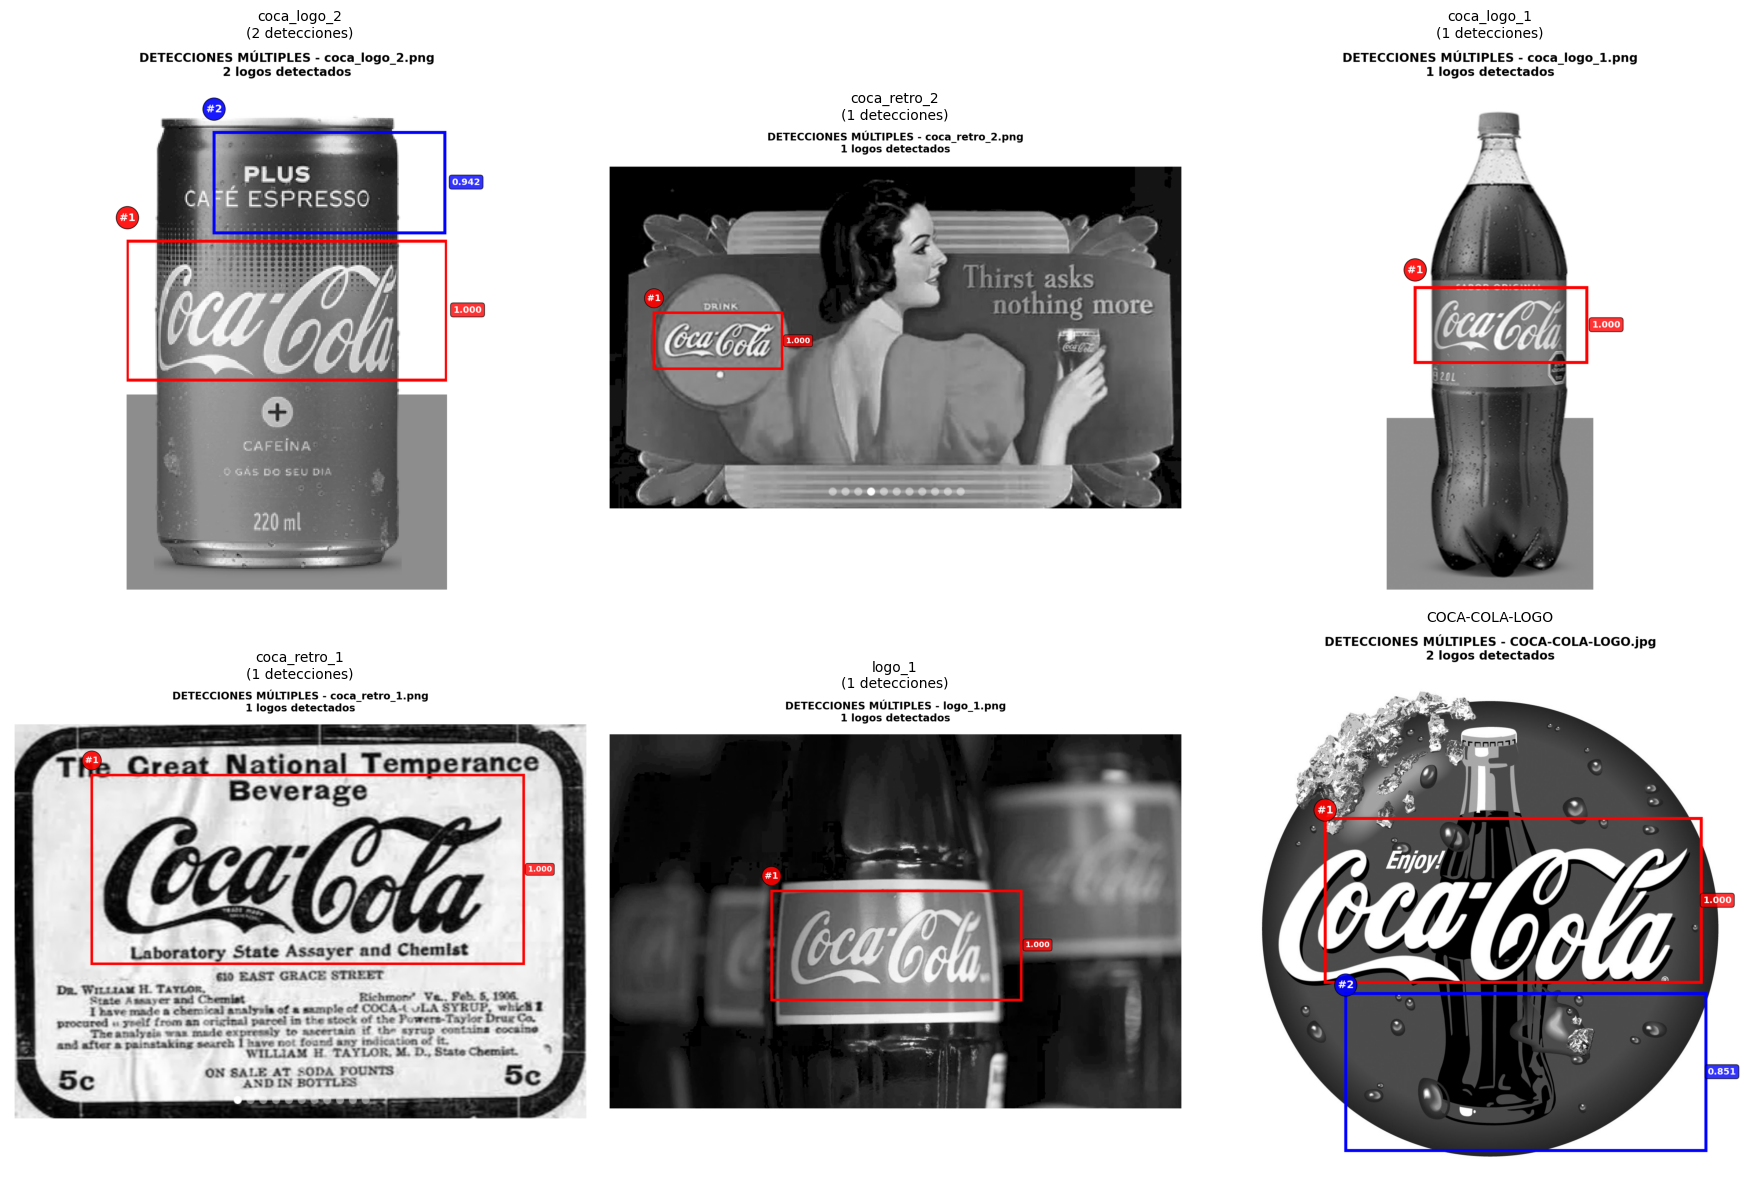

In [6]:
# Mostrar resultados de las mejores detecciones
directorio_resultados = config['CARPETA_RESULTADOS']

if os.path.exists(directorio_resultados):
    # Buscar imágenes de detecciones finales numeradas
    imagenes_finales = glob.glob(os.path.join(directorio_resultados, '*06_detecciones_finales_numeradas.png'))
    
    if imagenes_finales:
        print(f"Mostrando resultados de detecciones finales:")
        
        # Seleccionar hasta 6 imágenes para mostrar
        num_mostrar = min(6, len(imagenes_finales))
        
        if num_mostrar <= 3:
            rows, cols = 1, num_mostrar
            figsize = (6 * num_mostrar, 6)
        else:
            rows, cols = 2, 3
            figsize = (18, 12)
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        if num_mostrar == 1:
            axes = [axes]
        elif rows == 1:
            axes = axes
        else:
            axes = axes.flatten()
        
        for i in range(num_mostrar):
            img_path = imagenes_finales[i]
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            axes[i].imshow(img_rgb)
            nombre_archivo = os.path.basename(img_path)
            
            # Extraer nombre base de la imagen
            nombre_base = nombre_archivo.replace('_06_detecciones_finales_numeradas.png', '')
            
            # Obtener número de detecciones del resultado
            if nombre_base + '.png' in resultados:
                num_det = len(resultados[nombre_base + '.png'])
                titulo = f'{nombre_base}\n({num_det} detecciones)'
            else:
                titulo = nombre_base
            
            axes[i].set_title(titulo, fontsize=10)
            axes[i].axis('off')
        
        # Ocultar ejes no utilizados
        for i in range(num_mostrar, len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    else:
        print("No se encontraron imágenes de detecciones finales.")
        
        # Mostrar cualquier imagen disponible
        todas_imagenes = glob.glob(os.path.join(directorio_resultados, '*.png'))
        if todas_imagenes:
            print(f"\nImágenes disponibles en resultados ({len(todas_imagenes)} total):")
            for img in todas_imagenes[:10]:  # Mostrar hasta 10
                print(f"  - {os.path.basename(img)}")
            if len(todas_imagenes) > 10:
                print(f"  ... y {len(todas_imagenes) - 10} más")

else:
    print(f"Directorio de resultados no encontrado: {directorio_resultados}")